In [19]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

### Random Forest Regression

In [5]:
# Load the data
data_folder = os.path.join(os.path.dirname(os.getcwd()), 'data', 'joined')
files = [file for file in os.listdir(data_folder) if file.endswith('joined.csv')]
data = pd.concat([pd.read_csv(os.path.join(data_folder, file)) for file in files], ignore_index=True)

# Split the data into features and target variable
X = data.drop(['name', 'salary', 'salary_adjusted'], axis=1)
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from joblib import dump
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

def randomForestTunning(X, y):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    max_features = ['log2', 'sqrt', None]
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}


    # Random search of parameters, using 3 fold cross validation,
    # search across 100 different combinations, and use all available cores
    rf = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    # Fit the random search model
    rf_random.fit(X, y)
    return rf_random.best_params_

# Tunning the model
# best_params = randomForestTunning(X_train, y_train)
# print(best_params)
# params = {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 70, 'bootstrap': True}

# Create the model
model = RandomForestRegressor(n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=70, bootstrap=True)
model.fit(X_train, y_train)

# Save the model
model_folder = os.path.join(os.path.dirname(os.getcwd()), 'models')
if not os.path.exists(model_folder):
    os.makedirs(model_folder)
model_file = os.path.join(model_folder, 'random_forest_model.joblib')

dump(model, model_file)

['c:\\Users\\Gabriel\\Downloads\\nba-salary-model\\models\\random_forest_model.joblib']

Evaluate the model

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from joblib import load

# Load the model
model_folder = os.path.join(os.path.dirname(os.getcwd()), 'models')
model_file = os.path.join(model_folder, 'random_forest_model.joblib')
rf = load(model_file)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 31781461216682.445
R2 Score: 0.7390017109041883


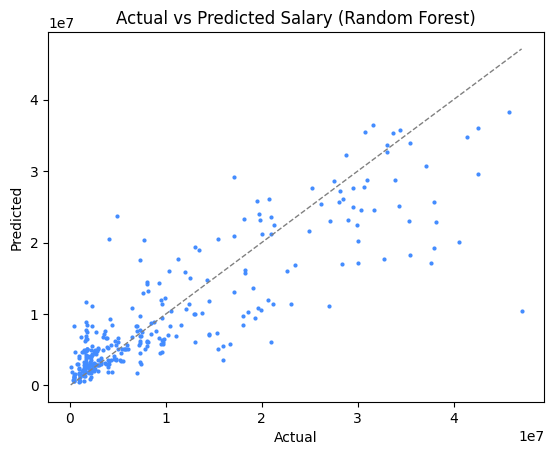

In [7]:
# Plot the predicted salary vs the actual salary and line of best fit
color_hex = '#438cff'
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, marker='o', s=4, color=color_hex)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', lw=1, color='gray')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Actual vs Predicted Salary (Random Forest)')
plt.show()

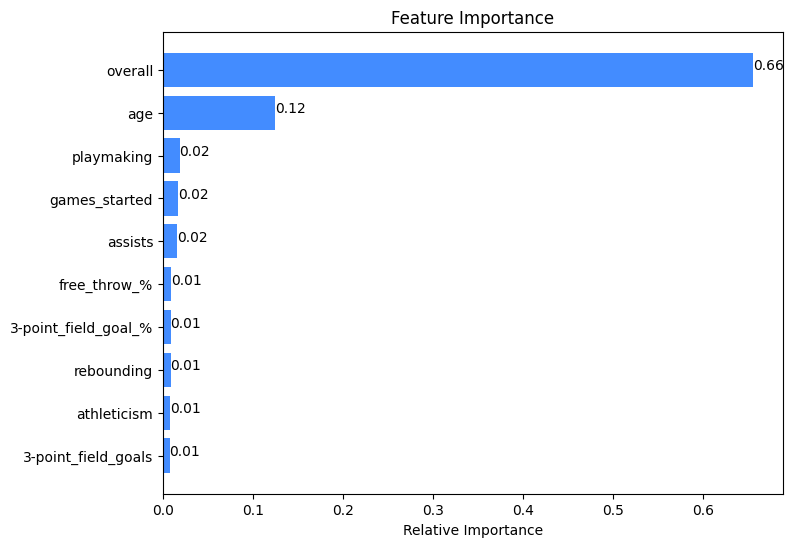

In [9]:
# Plot the top 10 feature importances of the forest, features on y-axis
feature_importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[-10:]
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], align='center', color=color_hex)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# Show values
for index, value in zip(range(len(indices)), feature_importances[indices]):
    plt.text(value, index, f'{value:.2f}')
plt.xlabel('Relative Importance')
plt.show()
